# Homework3 
# Jingyi Fu 
# UID: 506088659

# 1 ISL Exercise 4.8.1 (10pts)

$$p(x) = \frac{e^{\beta_0+\beta_1x}}{1 + e^{\beta_0+\beta_1x}}$$
Let$$Z = e^{\beta_0+\beta_1x}$$
Then$$p(x) = \frac{Z}{1+Z}$$
$$\because \frac{1}{p(x)} = \frac{1+Z}{Z} = \frac{1}{Z} + 1$$
$$\therefore Z = \frac{1}{\frac{1}{p(x)} - 1}$$
$$\therefore Z = \frac{p(x)}{1 - p(x)}$$
So that $e^{\beta_0+\beta_1x} = \frac{p(x)}{1-p(x)}$

# 2 ISL Exercise 4.8.6 (10pts)

$$P(X) = \frac{e^{\beta_0 + \beta_1X_1 +\beta_2X_2}}{1 + e^{\beta_0 + \beta_1X_1 +\beta_2X_2}}$$

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import io
import requests
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [92]:
# (a)
X = np.array([1,40,3.5])
beta = np.array([-6,0.05,1])

# calculate P(X)
pX = np.exp(beta.T@X) / (1 + np.exp(beta.T@X))

print('p(X) ' + str(np.around(pX, 4)))

p(X) 0.3775


In [ ]:
# (b)
# Given X2 = 3.5, P(X) = 0.5, calculate value of X1

$$P(X) = \frac{e^{-6+0.05X_1+X_2}}{1+e^{-6+0.05X_1+X_2}}$$

$$0.5 = \frac{e^{-2.5+0.05X_1}}{1+e^{-2.5+0.05X_1}}$$
$$log(0.5) = log(e^{0.05X_1-2.5}) - log(1+e^{0.05X_1-2.5})=0.05X_1-2.5-log(1+e^{0.05X_1-2.5})$$
$$e^{0.05X_1-2.5}=0.5(1+e^{0.05X_1-2.5}))$$
$$\therefore e^{0.05X_1-2.5}=1$$
$$\therefore X_1 = \frac{2.5}{0.05}=50$$


# 3 ISL Exercise 4.8.9 (10pts)

In [ ]:
# (a)

$$\because odds = \frac{P(X)}{1-P(X)}=0.37$$
$$\therefore P(X) = \frac{0.37}{1.37} = 0.27$$

In [ ]:
# (b)

$$P(X) = 0.16$$
$$\therefore odds = \frac{P(X)}{1-P(X)} = \frac{0.16}{1-0.16}=0.19$$

# 4 ISL Exercise 4.8.13 (a)-(i) (50pts)

In [3]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# weekly dataset
data = pd.read_csv('./Weekly.csv')
data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


In [5]:
# (a)
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


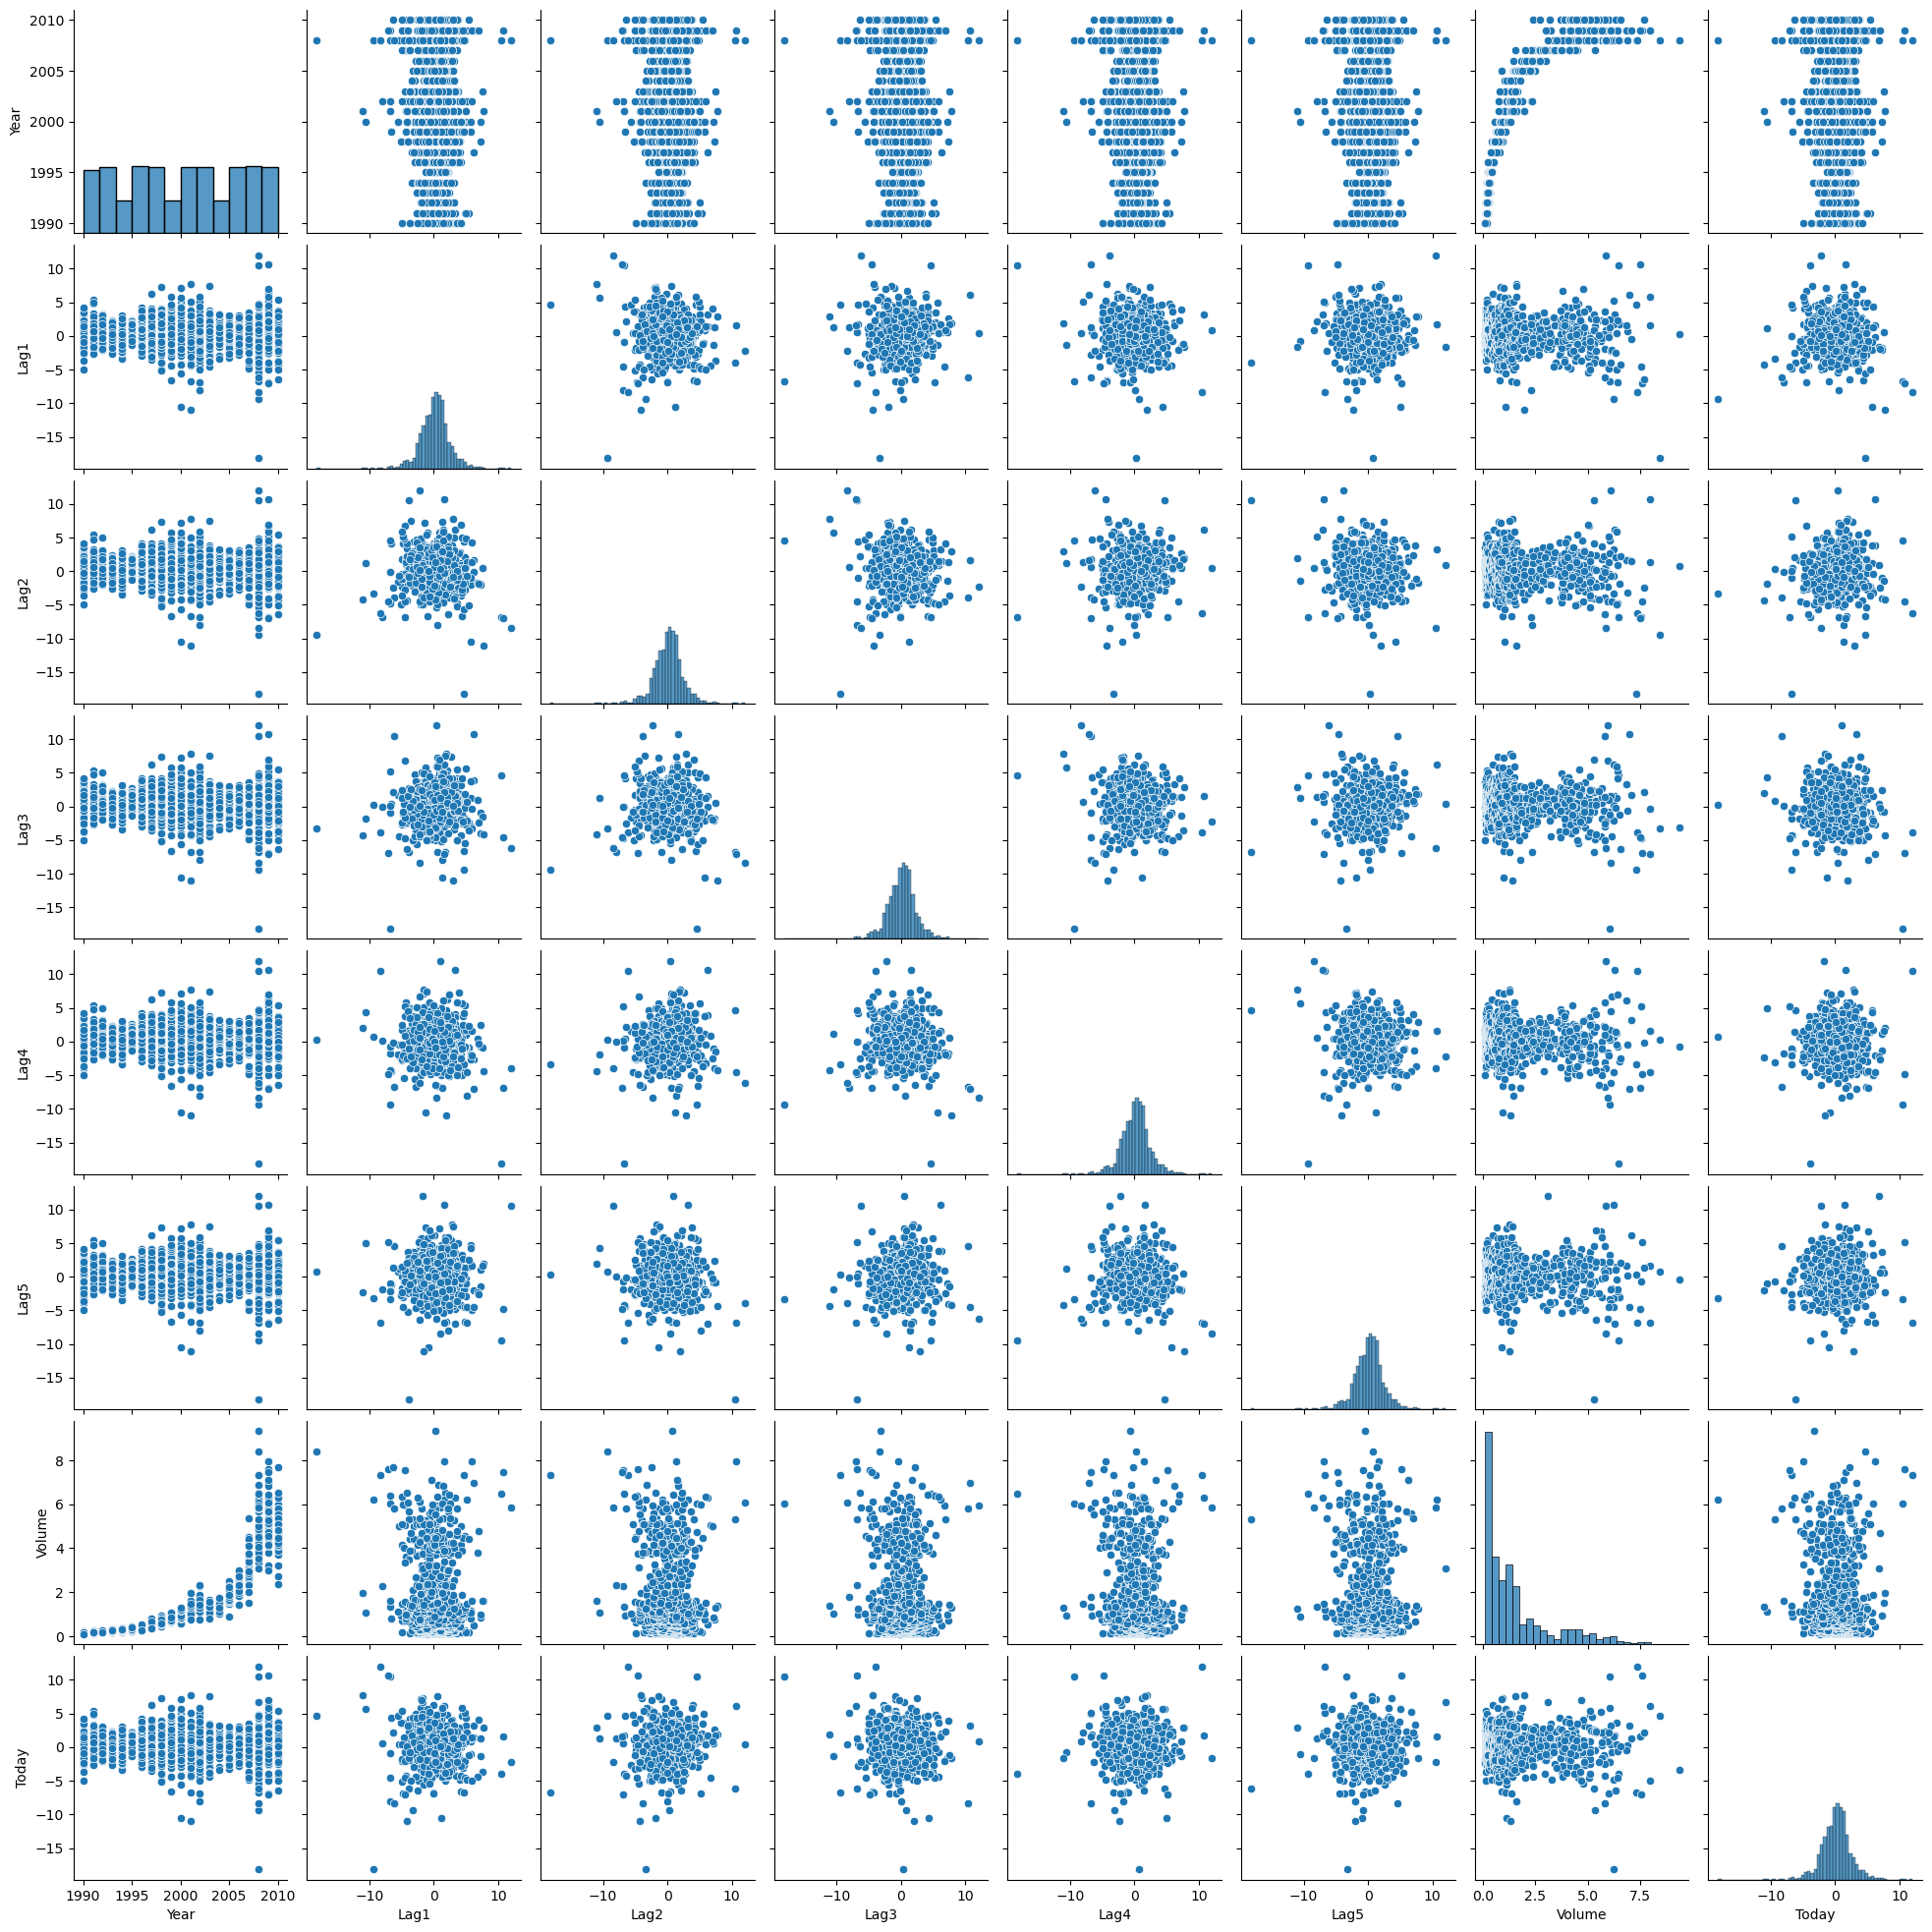

In [6]:
# Pairplot
sns.pairplot(data)

In [17]:
sns.pairplot(data, hue = "Direction")

In [7]:
# correlation matrix
corr = data.corr()
sns.heatmap(corr)

<AxesSubplot:>

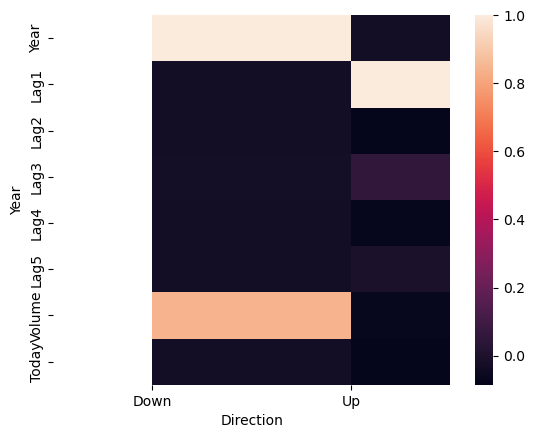

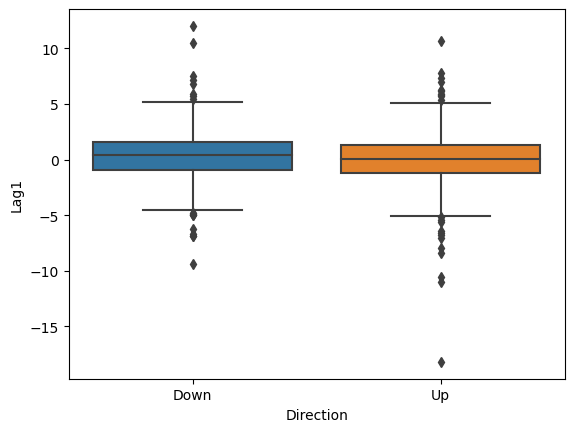

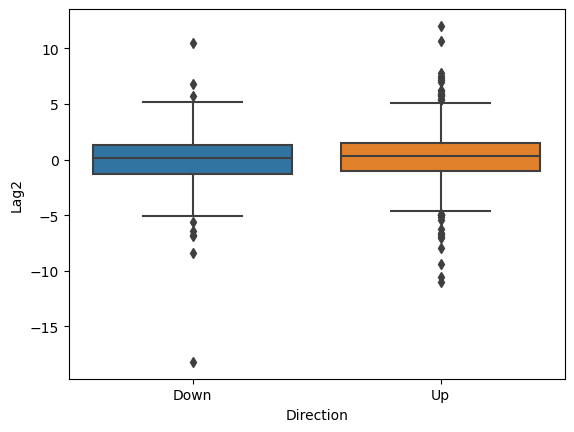

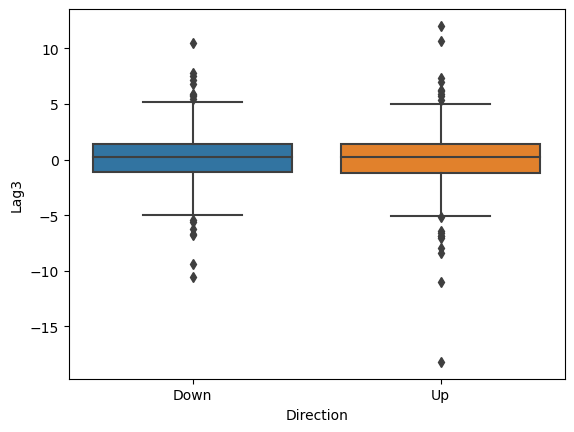

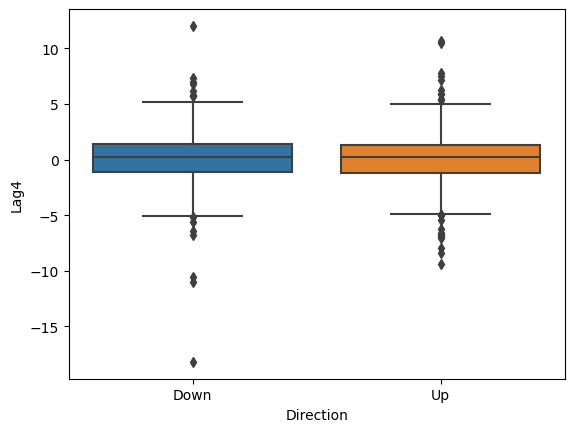

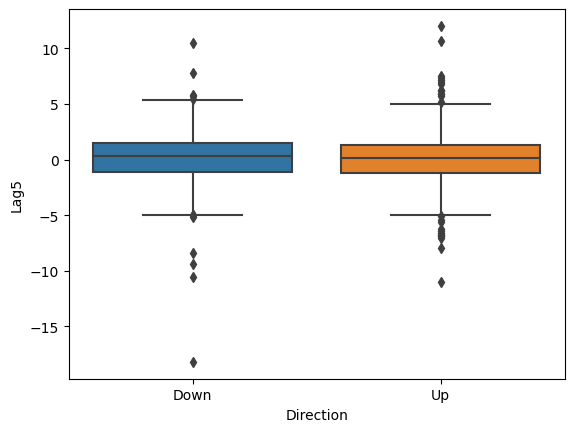

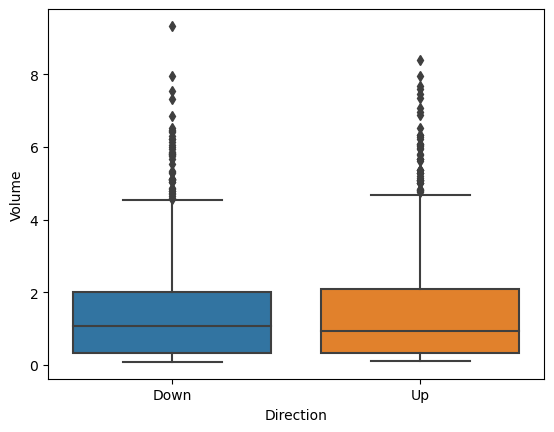

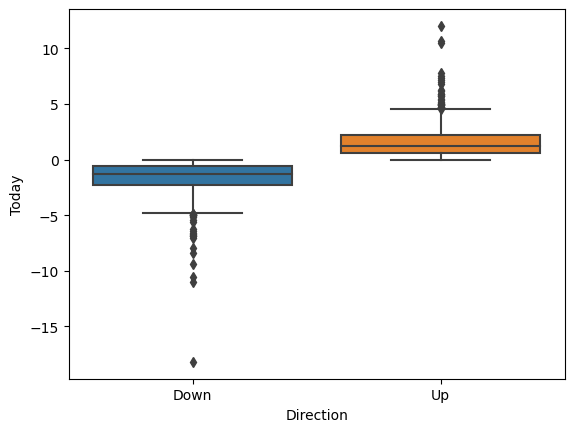

In [8]:
for col in data.columns:
    if col != 'Direction':
        sns.boxplot(y = col,x = 'Direction',data = data)
        plt.show()

In [9]:
# (b)
# transfer variable into dummy
data['Direction'] = data['Direction'].map({'Down':0,'Up':1})
data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [10]:
X = data.iloc[:,1:-2]
X = sm.add_constant(X)
y = data['Direction']
results = sm.Logit(y,X).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:                0.006580
Time:                        17:36:11   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [11]:
print("The regression result shows that the coefficient of Lag2 is significant different from 0. Others have too large p-value.")

The regression result shows that the coefficient of Lag2 is significant different from 0. Others have too large p-value.


In [12]:
# (c)
pred = results.predict(X)
pred_classes = np.where(pred>0.5,1,0)

# build a confusion matrix
cm = confusion_matrix(data['Direction'],pred_classes)
temp = pd.DataFrame(cm,['Down','Up'],['Down','Up'])
print(temp)

      Down   Up
Down    54  430
Up      48  557


In [13]:
print('percent of Up values in data ',temp.iloc[1,:].sum() / (temp.iloc[0,:].sum() + temp.iloc[1,:].sum()))
print('percent of Up values in prediction ',temp.iloc[:,1].sum() / (temp.iloc[:,1].sum() + temp.iloc[:,0].sum() ))

print('The Accuracy is ',accuracy_score(data['Direction'],pred_classes))

percent of Up values in data  0.5555555555555556
percent of Up values in prediction  0.90633608815427
The Accuracy is  0.5610651974288338


In [14]:
print("The confusion matrix shows the number of sample that is really down and up, and the number of sample that is predicted down and up. The result shows that 55% of the total observations are 'Up', while our model predicts 90% of data as 'Up'. The accuracy of confusion matrix is 0.56.So that only 56% results can be predicted acuurately by logistic models and there are much space to improve since nearly half of the results are not correct.")

The confusion matrix shows the number of sample that is really down and up, and the number of sample that is predicted down and up. The result shows that 55% of the total observations are 'Up', while our model predicts 90% of data as 'Up'. The accuracy of confusion matrix is 0.56.So that only 56% results can be predicted acuurately by logistic models and there are much space to improve since nearly half of the results are not correct.


In [15]:
# (d)
# use the workflow

In [23]:
# split into test and non-test sets
train_data = data[data["Year"] < 2009]
train_data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1
...,...,...,...,...,...,...,...,...,...
980,2008,12.026,-8.389,-6.198,-3.898,10.491,5.841565,-2.251,0
981,2008,-2.251,12.026,-8.389,-6.198,-3.898,6.093950,0.418,1
982,2008,0.418,-2.251,12.026,-8.389,-6.198,5.932454,0.926,1
983,2008,0.926,0.418,-2.251,12.026,-8.389,5.855972,-1.698,0


In [24]:
test_data = data[data["Year"] > 2008]
test_data

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
985,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,0
986,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,0
987,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,0
988,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,0
989,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,1
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,1


In [49]:
# Using the Logit class from StatsModels
y_other = train_data['Direction']
X_other = train_data["Lag2"]
y_test = test_data['Direction']
X_test = test_data['Lag2']

# logit model
logit_mod = sm.Logit(y_other, X_other)
logit_res = logit_mod.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.690654
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      984
Method:                           MLE   Df Model:                            0
Date:                Wed, 15 Feb 2023   Pseudo R-squ.:               -0.004340
Time:                        18:15:48   Log-Likelihood:                -680.29
converged:                       True   LL-Null:                       -677.35
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag2           0.0629      0.029      2.192      0.028       0.007       0.119
==============================================================================
"""

In [64]:
def analyze_confusion_matrix_and_acc(true,pred):
    cm = confusion_matrix(true,pred)
    temp = pd.DataFrame(cm,['Down','Up'],['Down','Up'])
    print(temp)
    print('')
    print('The Accuracy is ',accuracy_score(true,pred))

In [63]:
# logistic regression
lr = LogisticRegression()
lr.fit(X_train.to_frame(),y_train)

LogisticRegression()

In [79]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

In [80]:
pred1 = lr.predict(X_test.to_frame())

analyze_confusion_matrix_and_acc(y_test,pred1)

      Down  Up
Down     9  34
Up       5  56

The Accuracy is  0.625


In [66]:
# (e)
# LDA model

lda = LDA()
lda.fit(X_train.to_frame(),y_train)

LinearDiscriminantAnalysis()

In [81]:
# confusion matrix
pred2 = lda.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred2)

      Down  Up
Down     9  34
Up       5  56

The Accuracy is  0.625


In [82]:
# (f)
# QDA model
qda =QDA()
qda.fit(X_train.to_frame(),y_train)

QuadraticDiscriminantAnalysis()

In [83]:
pred3 = qda.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred3)

      Down  Up
Down     0  43
Up       0  61

The Accuracy is  0.5865384615384616


In [84]:
# (g)
# KNN N=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train.to_frame(),y_train)

KNeighborsClassifier(n_neighbors=1)

In [85]:
pred4 = knn_1.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred4)

      Down  Up
Down    22  21
Up      30  31

The Accuracy is  0.5096153846153846


C:\Users\45713\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [86]:
# (h)
# naive Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train.to_frame(),y_train)

GaussianNB()

In [87]:
pred5 = nb.predict(X_test.to_frame())
analyze_confusion_matrix_and_acc(y_test,pred5)

      Down  Up
Down     0  43
Up       0  61

The Accuracy is  0.5865384615384616


In [88]:
# (i)
print("The accuracy score shows that LDA and logistic regression have the highest accuracy scores. They provide the best results.")

The accuracy score shows that LDA and logistic regression have the highest accuracy scores. They provide the best results.


# 6 Bonus question: ISL Exercise 4.8.4 (30pts)

$p=1$

$X~N(0,1)$

(a)$$n_k = \frac{1}{10}n$$
We look at 10% of the overall data.

(b)10% * 10% = 1%

We look at 1% of the total data.

(c)That will be (10%)^100, which is $0.1^n$.

(d)In general, $n_k=\frac{r_n^p}{r}$.

So that the number of neighbours decreases with the power of p.

(e)When p=1,

l=0.1*1 = 0.1

When p=2,
$$l^2 = 0.1 * 1^2$$
$$l = (0.1*1^2)^{\frac{1}{2}}=0.316$$

When p=100,
$$l^100 = 0.1*1^100$$
$$l=(0.1*1^100)^{\frac{1}{100}}=0.977$$

As the dimensionality of p increases,the range of each predictor that is required to encapsulate a given fraction of our obsevations increases exponentially.

When the "neighbours" are not near, KNN's effectiveness deteriorates.